In [2]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda
import myfunc as mf

# Import the dataset
data = pd.read_csv('diameter_phase1.csv')

# Inspect the dataset
print(data.head())
print(data.info())

   idx       diam  shift
0    1  20.135188      1
1    2  20.041851      1
2    3  20.088567      1
3    4  20.184568      1
4    5  20.162651      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   idx     80 non-null     int64  
 1   diam    80 non-null     float64
 2   shift   80 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 2.0 KB
None


Number of points n = 80
Mean = 20.00


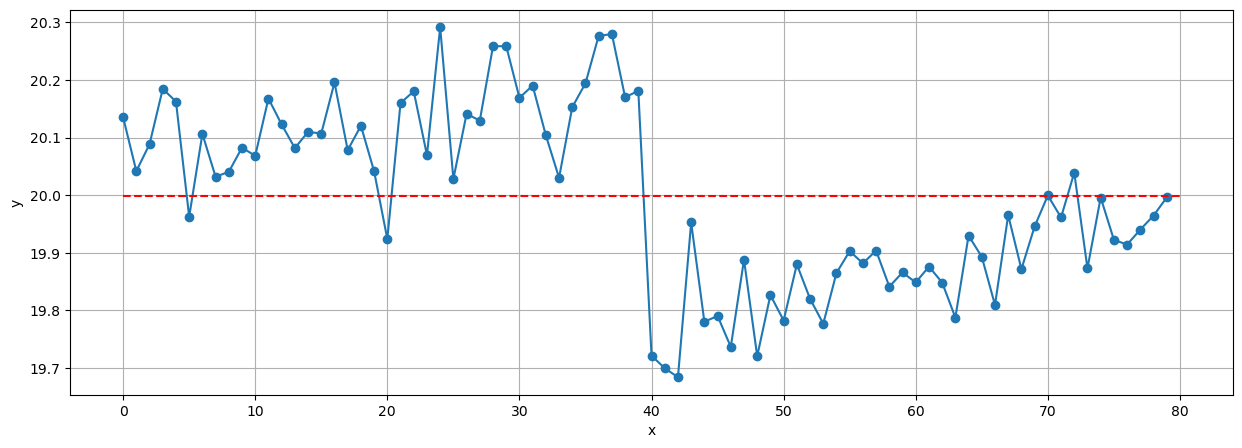

In [2]:
mf.single_ts_plot(data['diam'])

In [3]:
data['dummy_shift']=np.zeros(len(data))
data['dummy_shift'].iloc[40:]=np.ones(len(data)-40)

c:\Users\Utente\anaconda3\envs\qda_environment\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


p-value of the Shapiro-Wilk test: 0.084


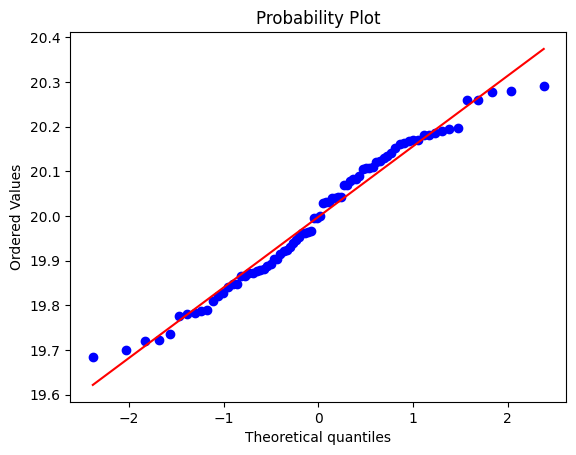

Accept H0: the data are normal
Runs test statistic = -6.976
Runs test p-value = 0.000
Reject H0: the data are not random


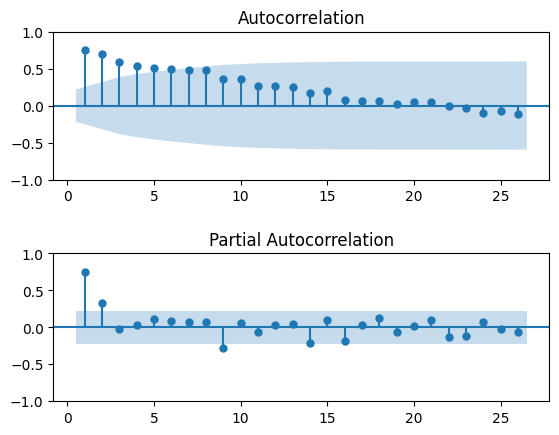

In [5]:
mf.shapiroqq(data['diam'])
mf.runs(data['diam'])
mf.acfpacf(data['diam'])

In [6]:

import statsmodels.api as sm

x = data['dummy_shift'] #se solo un regressore togli le doppie quadre e metti singole
x = sm.add_constant(x) 
y = data['diam']
model = sm.OLS(y, x).fit()
qda.summary(model)



REGRESSION EQUATION
-------------------
diam =  + 20.128 const -0.260 dummy_shift

COEFFICIENTS
------------
       Term    Coef  SE Coef   T-Value     P-Value
      const 20.1280   0.0136 1477.6890 3.2970e-175
dummy_shift -0.2605   0.0193  -13.5216  3.8267e-22

MODEL SUMMARY
-------------
     S  R-sq  R-sq(adj)
0.0861 0.701     0.6971

ANALYSIS OF VARIANCE
---------------------
     Source   DF     Adj SS     Adj MS    F-Value     P-Value
 Regression  1.0     1.3569     1.3569 1.8283e+02  3.8267e-22
      const  1.0 16205.5106 16205.5106 2.1836e+06 3.2970e-175
dummy_shift  1.0     1.3569     1.3569 1.8283e+02  3.8267e-22
      Error 78.0     0.5789     0.0074        NaN         NaN
      Total 79.0     1.9358        NaN        NaN         NaN


Shapiro-Wilk test p-value on the residuals = 0.618


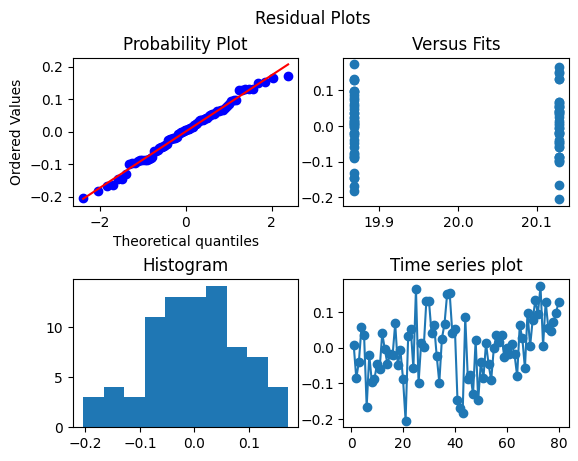

In [7]:
mf.shapirplusresplots(model)

In [7]:
mf.runs(model.resid)

Runs test statistic = -2.685
Runs test p-value = 0.007
Reject H0: the data are not random


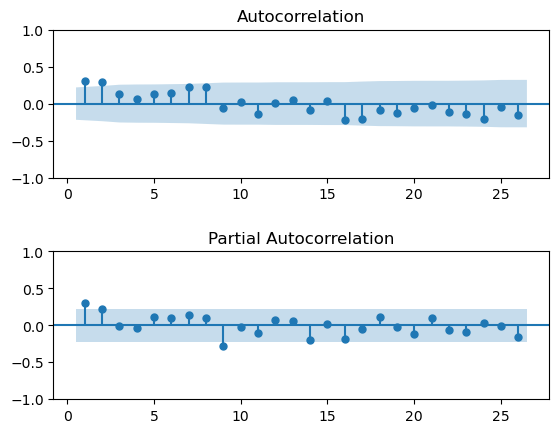

Test statistic rk = 0.300299
Rejection region at 0.219131, which is the value of z_alpha2/np.sqrt(n)
The null hypothesis is rejected


In [8]:
mf.acfpacf(model.resid)
mf.bartlett_test(model.resid,1)

In [8]:
import statsmodels.api as sm
data['lag1']=data['diam'].shift(1)
data['lag2']=data['diam'].shift(2)
x = data[['lag1','idx']].iloc[1:,:] #se solo un regressore togli le doppie quadre e metti singole
x = sm.add_constant(x) 
y = data['diam'][1:]
model = sm.OLS(y, x).fit()
qda.summary(model)


REGRESSION EQUATION
-------------------
diam =  + 7.265 const + 0.639 lag1 -0.001 idx

COEFFICIENTS
------------
 Term    Coef  SE Coef  T-Value    P-Value
const  7.2649   1.8043   4.0265 1.3287e-04
 lag1  0.6393   0.0895   7.1427 4.7227e-10
  idx -0.0013   0.0006  -2.0859 4.0342e-02

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
0.1022 0.5855     0.5746

ANALYSIS OF VARIANCE
---------------------
    Source   DF  Adj SS  Adj MS  F-Value    P-Value
Regression  2.0  1.1223  0.5611  53.6819 2.9175e-15
     const  1.0  0.1695  0.1695  16.2125 1.3287e-04
      lag1  1.0  0.5333  0.5333  51.0186 4.7227e-10
       idx  1.0  0.0455  0.0455   4.3511 4.0342e-02
     Error 76.0  0.7944  0.0105      NaN        NaN
     Total 78.0  1.9167     NaN      NaN        NaN


In [11]:
x = data[['shift','idx']] #se solo un regressore togli le doppie quadre e metti singole
x = sm.add_constant(x) 
y = data['diam']
model = sm.OLS(y, x).fit()
qda.summary(model)

REGRESSION EQUATION
-------------------
diam =  + 20.475 const -0.438 shift + 0.004 idx

COEFFICIENTS
------------
 Term    Coef  SE Coef  T-Value     P-Value
const 20.4751   0.0277 738.1943 5.4413e-150
shift -0.4381   0.0310 -14.1534  3.9903e-23
  idx  0.0044   0.0007   6.6255  4.2162e-09

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
0.0692 0.8095     0.8046

ANALYSIS OF VARIANCE
---------------------
    Source   DF    Adj SS    Adj MS     F-Value     P-Value
Regression  2.0    1.5671    0.7836    163.6426  1.8724e-28
     const  1.0 2609.2466 2609.2466 544930.7856 5.4413e-150
     shift  1.0    0.9592    0.9592    200.3189  3.9903e-23
       idx  1.0    0.2102    0.2102     43.8975  4.2162e-09
     Error 77.0    0.3687    0.0048         NaN         NaN
     Total 79.0    1.9358       NaN         NaN         NaN


Shapiro-Wilk test p-value on the residuals = 0.870


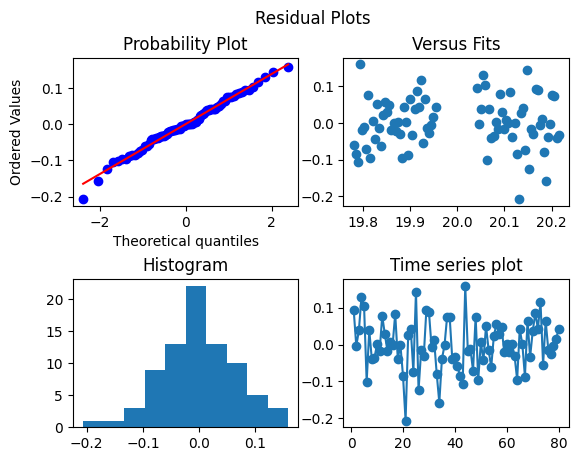

In [12]:
mf.shapirplusresplots(model)